# 🌸 Project One: Iris Flower Classification
---
## 📌 Dataset Overview
This notebook uses the **Iris dataset**, one of the most famous benchmark datasets in **Machine Learning** and **Statistics**, originally introduced by **Ronald Fisher (1936)**.

The dataset contains measurements of iris flowers from **three different species**, and the goal is to **predict the flower species based on its physical characteristics**.

---

## 🌼 Classes (Target Variable)
The dataset includes **3 flower species**:

- **Iris Setosa**
- **Iris Versicolor**
- **Iris Virginica**

Each class contains **50 samples**, making the dataset perfectly balanced  
(**Total samples = 150**).

---

## 📏 Features (Input Variables)
Each flower is described using **four numerical features**, measured in centimeters (cm):

| Feature Name | Description |
|-------------|-------------|
| Sepal Length | Length of the sepal |
| Sepal Width | Width of the sepal |
| Petal Length | Length of the petal |
| Petal Width | Width of the petal |

---

## 🎯 Objective
The main objective of this project is to build **classification models** that can accurately predict the **species of an iris flower** given its four measurements.

---

## 🧠 Why Iris Dataset?
- Small and easy to understand
- Clean (no missing values)
- Balanced classes
- Ideal for **EDA, visualization, and classification**
- Widely used in academic courses and interviews

---

## 🔎 Expected Observations
- **Setosa** is easily separable from the other species
- Some overlap exists between **Versicolor** and **Virginica**
- Petal-related features provide the strongest discrimination

---

## 🛠 Tools & Libraries
- Python
- NumPy & Pandas
- Matplotlib & Seaborn
- Scikit-learn


# First Load Iris Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(enumerate(iris.target_names)))

df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [14]:
# detect duplicates
df.duplicated().sum()

np.int64(1)

## Visualize Feature Pairs

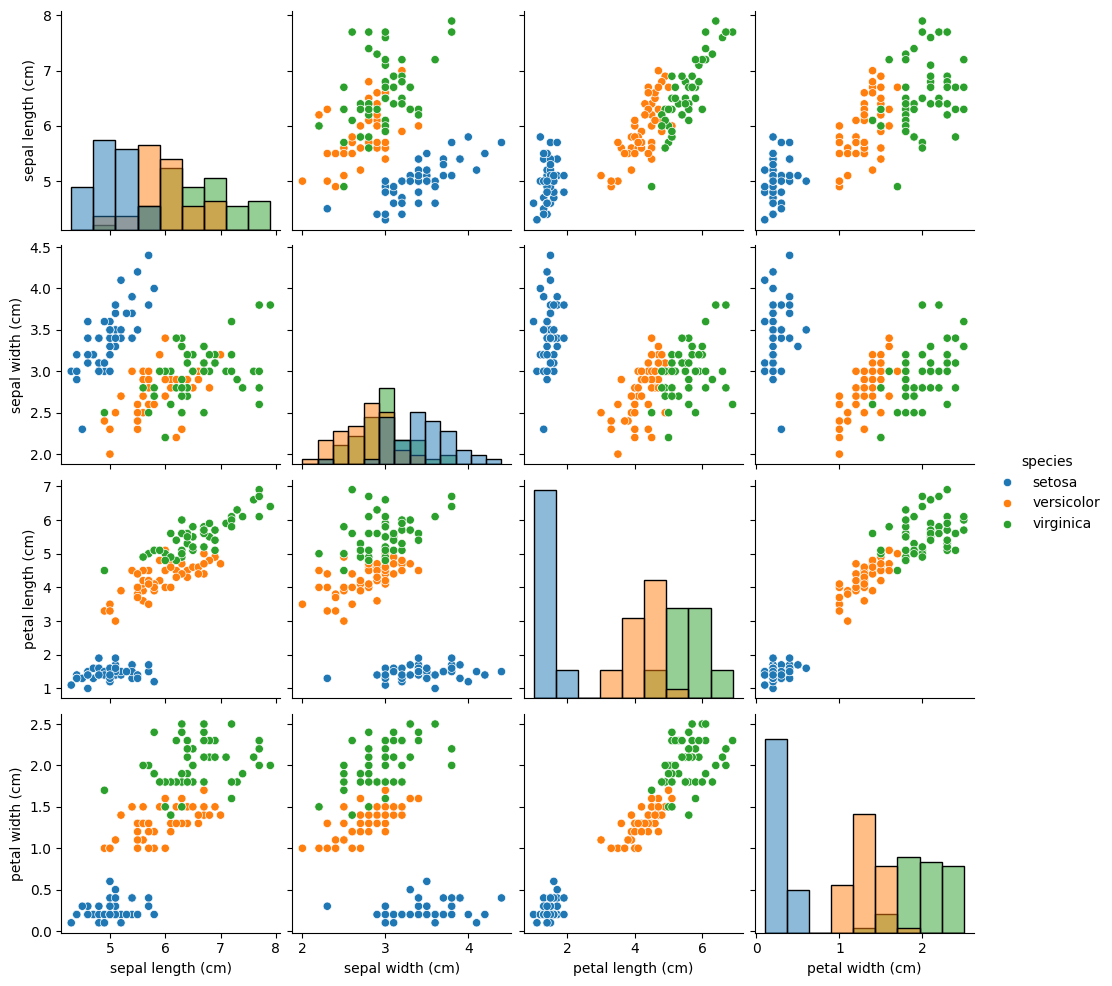

In [15]:
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()


## Train/Test Split

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train Models

## 1. Logistic Regression

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
# Make predictions
y_pred = logreg.predict(X_test)
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



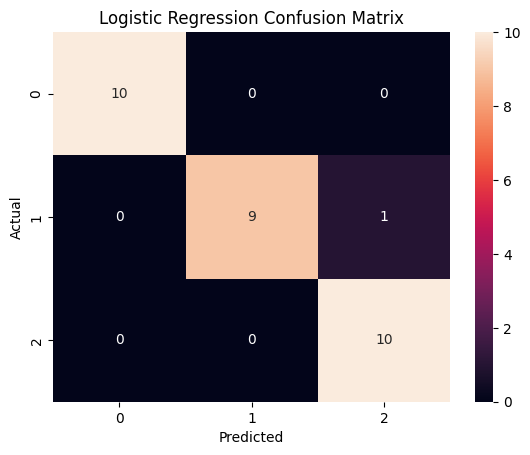

In [24]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Train Logistic Regression with different penalties: L1, L2

In [22]:
# L2 Regularization Ridge
logreg_l2_tuned = LogisticRegression( 
    penalty='l2' , 
    C=0.5 , 
    max_iter=1000 , 
    random_state=42 
)
# Fit the model
logreg_l2_tuned.fit(X_train, y_train)
# Make predictions
y_pred_l2_tuned = logreg_l2_tuned.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2_tuned))
print("--- Logistic Regression with L2 Regularization  ---")
print(classification_report(y_test, y_pred_l2_tuned))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
--- Logistic Regression with L2 Regularization  ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
# L1 regularization (Lasso) 
logreg_l1 = LogisticRegression(
    penalty='l1',      
    C=0.5,               
    solver='liblinear', 
    max_iter=1000,       
    random_state=42      
)

logreg_l1.fit(X_train, y_train)
# Make predictions
y_pred_l1 = logreg_l1.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_l1))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


## 2.Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
# Make predictions
y_pred_tree = tree_clf.predict(X_test)
# performance report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



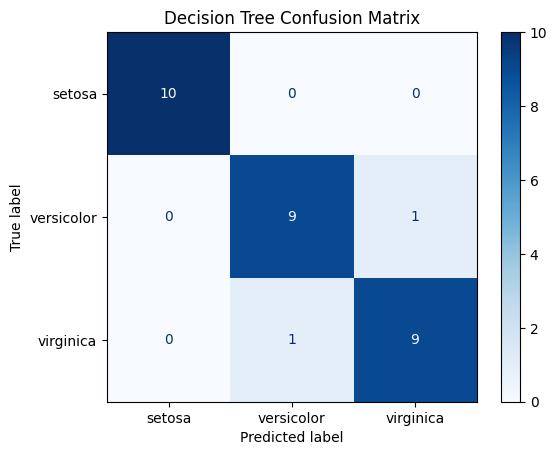

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    tree_clf,
    X_test,
    y_test,
    display_labels=tree_clf.classes_,
    cmap="Blues"
)

plt.title("Decision Tree Confusion Matrix")
plt.show()


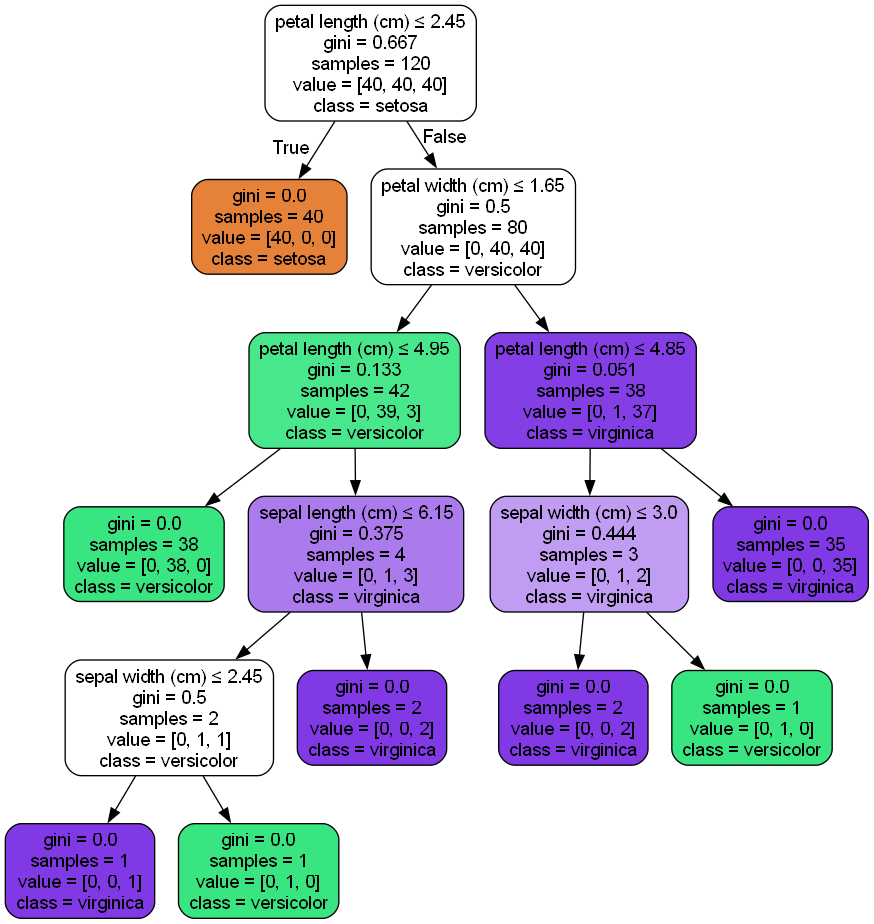

In [26]:
# Visualizing the Decision Tree
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
model_to_plot = tree_clf 
features = X.columns
dot_data = StringIO()
export_graphviz(
    model_to_plot,
    out_file=dot_data,
    feature_names=features,
    class_names=[str(c) for c in model_to_plot.classes_], 
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## 📊 Model Accuracy Comparison

The table below compares the accuracy of all trained models on the Iris dataset.  
Models are ranked from highest to lowest accuracy.

| Rank | Model | Accuracy |
|------|------|----------|
| 1️⃣ | Logistic Regression | 0.97 |
| 2️⃣ | Logistic Regression (L2 – Ridge, C=0.5) | 0.97 |
| 3️⃣ | Logistic Regression (L1 – Lasso, C=0.5) | 0.97 |
| 4️⃣ | Decision Tree Classifier | 0.93 |

---

## 🧠 Interpretation

- Logistic Regression achieved the highest accuracy, indicating that the Iris dataset is well-suited for linear classification.
- L2 regularization maintains high accuracy while improving model stability.
- L1 regularization slightly reduces accuracy due to feature sparsity.
- The Decision Tree model performs well but is more sensitive to overfitting without hyperparameter tuning.

---

## ✅ Conclusion

Logistic Regression models are the most accurate and reliable choice for classifying the Iris dataset.


## Simple CLI – Iris Species Prediction

In [28]:
def predict_species_cli(model):
    print("🌸 Iris Flower Species Prediction 🌸")
    print("Please enter the flower measurements in centimeters:\n")

    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width  = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width  = float(input("Petal Width (cm): "))

    sample = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(sample)

    print("\n✅ Predicted Species:", prediction[0])


In [29]:
# Use the best performing model (Logistic Regression)
predict_species_cli(logreg)


🌸 Iris Flower Species Prediction 🌸
Please enter the flower measurements in centimeters:


✅ Predicted Species: setosa


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 🖥️ Command Line Interface (CLI) for Prediction

A simple command-line interface is implemented to allow users to input flower measurements and predict the corresponding iris species using the trained model.
